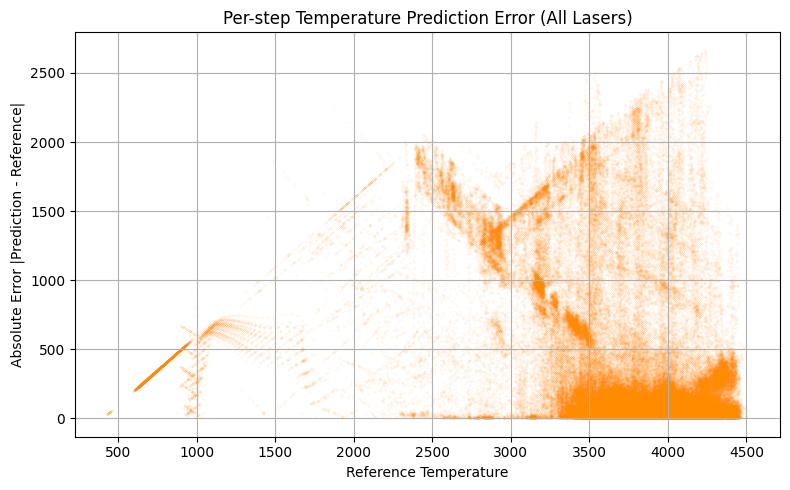

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ── Directory of saved outputs ───────────────────────
load_dir = "/home/ftk3187/github/DPC_research/02_DED/4_policy_0725/simulation_outputs"
laser_numbers = list(range(2, 50))

# ── 저장용 리스트 ──────────────────────────────────────
ref_temp_all = []
abs_error_all = []

for laser_num in laser_numbers:
    try:
        # Load files
        ref_path = os.path.join(load_dir, f"ref_laser_{laser_num}.csv")
        x_path   = os.path.join(load_dir, f"x_outputs_laser_{laser_num}.csv")

        ref_df = pd.read_csv(ref_path)
        x_df = pd.read_csv(x_path)

        # Extract first column (melt pool temperature)
        ref_temp = ref_df.iloc[:, 0].values
        pred_temp = x_df.iloc[:, 0].values

        # Trim to same length
        min_len = min(len(ref_temp), len(pred_temp))
        ref_temp = ref_temp[:min_len]
        pred_temp = pred_temp[:min_len]

        # Compute absolute error or squared error
        abs_error = np.abs(pred_temp - ref_temp)

        # Accumulate for all lasers
        ref_temp_all.append(ref_temp)
        abs_error_all.append(abs_error)

    except Exception as e:
        print(f"❌ Error processing laser {laser_num}: {e}")

# ── Concatenate all points ────────────────────────────
ref_temp_all = np.concatenate(ref_temp_all)
abs_error_all = np.concatenate(abs_error_all)

# ── Scatter plot ──────────────────────────────────────
plt.figure(figsize=(8, 5))
plt.scatter(ref_temp_all, abs_error_all, s=0.005, alpha=0.5, color='darkorange')
plt.xlabel("Reference Temperature")
plt.ylabel("Absolute Error |Prediction - Reference|")
plt.title("Per-step Temperature Prediction Error (All Lasers)")
plt.grid(True)
plt.tight_layout()
plt.show()
